In [1]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pymysql
#連接 MySQL 資料
conn = pymysql.connect(
                host='127.0.0.1',
                user='root',
                passwd='cookiechad',
                db='house'
                )
df = pd.read_sql_query("select * from govhouse_all",conn)
df
#另一種從mysql取資料的方式
#with conn.cursor() as mycursor:
#mycursor.execute("select * from gov_distance")
#result = mycursor.fetchall()
#本來的csv讀檔方式
#df = pd.read_csv('E:\merge_govhouse0619.csv',encoding='utf-8')
#df.columns
#df

,id,town,address,land_area,txn_dt,txn_floor,total_floor,building_type,age,building_area,...,hospital_d300,hospital_d500,hospital_d1000,hospital_d3000,hospital_dmin,police_d300,police_d500,police_d1000,police_d3000,police_dmin
0,3,111,台北市士林區大西路219巷76號,48.400000,26794,99,2,4,20805,69.397000,...,0,0,1,5,633.22,2,2,3,13,228.55
1,13,111,台北市士林區仰德大道二段70巷16號,176.036850,27514,99,1,4,20075,59.269000,...,0,0,0,3,1469.37,0,0,1,8,951.29
2,14,111,台北市士林區仰德大道二段70巷16號,63.488700,27514,99,1,4,20075,21.641000,...,0,0,0,3,1469.37,0,0,1,8,951.29
3,15,111,台北市士林區仰德大道二段70巷16號,49.059450,27514,99,1,4,20075,16.199000,...,0,0,0,3,1469.37,0,0,1,8,951.29
4,19,111,台北市士林區文林路496號,14.217500,27687,99,3,4,20075,39.839000,...,0,1,1,4,407.16,0,0,2,13,646.15
5,26,111,台北市士林區延平北路五段76號,29.645000,27421,99,2,4,19345,47.825000,...,0,0,0,4,1816.48,0,0,2,17,592.21
6,27,111,台北市士林區仰德大道一段6巷46號,13.915000,27464,99,1,4,19345,14.453000,...,0,0,1,4,936.33,1,1,1,11,203.68
7,30,111,台北市士林區建業路16號,111.247400,27432,99,1,4,19345,16.462000,...,0,0,0,0,3133.86,1,1,1,4,233.13
8,34,111,台北市士林區福壽街46號,34.182500,27211,99,2,4,18980,54.619000,...,0,0,1,4,528.16,0,0,2,12,621.11
9,38,111,台北市士林區仰德大道一段91巷46號,120.437350,27500,99,1,4,19345,32.603000,...,0,0,1,4,874.55,0,0,1,11,533.09


In [2]:
df.isnull().sum()
df['address']

0               台北市士林區大西路219巷76號
1             台北市士林區仰德大道二段70巷16號
2             台北市士林區仰德大道二段70巷16號
3             台北市士林區仰德大道二段70巷16號
4                  台北市士林區文林路496號
5                台北市士林區延平北路五段76號
6              台北市士林區仰德大道一段6巷46號
7                   台北市士林區建業路16號
8                   台北市士林區福壽街46號
9             台北市士林區仰德大道一段91巷46號
10                台北市士林區舊佳里前街46號
11         台北市士林區重慶北路四段49巷15弄46號
12                台北市士林區後街21巷16號
13              台北市士林區中正路201巷16號
14                台北市士林區故宮路7巷16號
15             台北市士林區仰德大道一段6巷76號
16                 台北市士林區菁山路106號
17               台北市士林區社中街33巷16號
18        台北市士林區社子里延平北路六段116巷76號
19              台北市士林區社中街458巷16號
20               台北市士林區磺溪街50巷16號
21               台北市士林區力行街20巷16號
22                 台北市士林區後港街196號
23            台北市士林區中山北路七段63巷16號
24              台北市士林區中正路236巷16號
25           台北市士林區延平北路五段285巷46號
26                  台北市士林區華岡路16號
27           台北市士林區延平北路五段302巷16號
28                  台北市士林區大西路76號
29           台北市士林區延平北路九段243巷16號
          

In [3]:
#丟掉 '文字' 及 '空值過多' 欄位 
#df = df.drop(['address', 'balcony','parking_way','parking_price'],axis=1)
df = df.drop(['address'],axis=1)
df

,id,town,land_area,txn_dt,txn_floor,total_floor,building_type,age,building_area,room,...,hospital_d300,hospital_d500,hospital_d1000,hospital_d3000,hospital_dmin,police_d300,police_d500,police_d1000,police_d3000,police_dmin
0,3,111,48.400000,26794,99,2,4,20805,69.397000,4,...,0,0,1,5,633.22,2,2,3,13,228.55
1,13,111,176.036850,27514,99,1,4,20075,59.269000,4,...,0,0,0,3,1469.37,0,0,1,8,951.29
2,14,111,63.488700,27514,99,1,4,20075,21.641000,5,...,0,0,0,3,1469.37,0,0,1,8,951.29
3,15,111,49.059450,27514,99,1,4,20075,16.199000,3,...,0,0,0,3,1469.37,0,0,1,8,951.29
4,19,111,14.217500,27687,99,3,4,20075,39.839000,0,...,0,1,1,4,407.16,0,0,2,13,646.15
5,26,111,29.645000,27421,99,2,4,19345,47.825000,2,...,0,0,0,4,1816.48,0,0,2,17,592.21
6,27,111,13.915000,27464,99,1,4,19345,14.453000,2,...,0,0,1,4,936.33,1,1,1,11,203.68
7,30,111,111.247400,27432,99,1,4,19345,16.462000,0,...,0,0,0,0,3133.86,1,1,1,4,233.13
8,34,111,34.182500,27211,99,2,4,18980,54.619000,2,...,0,0,1,4,528.16,0,0,2,12,621.11
9,38,111,120.437350,27500,99,1,4,19345,32.603000,5,...,0,0,1,4,874.55,0,0,1,11,533.09


In [4]:
#更改時間欄位型態 -> 只取出"年" -> 並將值轉為int型態  
#df['txn_dt'].dtype
#df['txn_dt'] = pd.to_datetime(df['txn_dt'], format = "%Y/%m/%d", errors = 'coerce')
#df['txn_year'] = df['txn_dt'].dt.year
#df['building_complete_dt'] = pd.to_datetime(df['building_complete_dt'], format = "%Y/%m/%d", errors = 'coerce')
#df['building_complete_year'] = df['building_complete_dt'].dt.year
#只留新增的欄位
#df = df.drop(['txn_dt','building_complete_dt'],axis=1)
#df

In [5]:
#找出空值
#df[df.isnull().values==True]
#分類型變數用眾數去補非連續性欄位
#mat_mode = df['building_material'].mode()
#df['building_material'] = df['building_material'].fillna(mat_mode[0])
#land_mode = df['land_use'].mode()
#df['land_use']=df['land_use'].fillna(land_mode[0])
#bath_mode = df['bathroom'].mode()
#df['bathroom']=df['bathroom'].fillna(bath_mode[0])
#移轉樓層用中位數去補空值
#floor_med = df['txn_floor'].median()
#df['txn_floor']=df['txn_floor'].fillna(floor_med)

In [6]:
#檢查是否有空值
df[df.isnull().values==True]

,id,town,land_area,txn_dt,txn_floor,total_floor,building_type,age,building_area,room,...,hospital_d300,hospital_d500,hospital_d1000,hospital_d3000,hospital_dmin,police_d300,police_d500,police_d1000,police_d3000,police_dmin


In [7]:
#查看欄位及筆數,確認空值是否填完
#df.shape
#df.info()
#df.columns
df.isnull().sum()

id                   0
town                 0
land_area            0
txn_dt               0
txn_floor            0
total_floor          0
building_type        0
age                  0
building_area        0
room                 0
hall                 0
bathroom             0
total_price          0
park_d300            0
park_d500            0
park_d1000           0
park_d3000           0
park_dmin            0
market_d300          0
market_d500          0
market_d1000         0
market_d3000         0
market_dmin          0
nightmarket_d300     0
nightmarket_d500     0
nightmarket_d1000    0
nightmarket_d3000    0
nightmarket_dmin     0
religion_d300        0
religion_d500        0
                    ..
incinerator_d300     0
incinerator_d500     0
incinerator_d1000    0
incinerator_d3000    0
incinerator_dmin     0
school_d300          0
school_d500          0
school_d1000         0
school_d3000         0
school_dmin          0
airport_d300         0
airport_d500         0
airport_d10

In [8]:
#把欄位名稱轉成list
#col = list(df.columns)
#此行為對每個欄位的值轉為數值型態
#df[col] = df[col].apply(pd.to_numeric, errors='coerce')

#將資料轉為浮點數型態，為了讓XGboost能讀取
df_new = pd.DataFrame(df, dtype='float') 
df_new

,id,town,land_area,txn_dt,txn_floor,total_floor,building_type,age,building_area,room,...,hospital_d300,hospital_d500,hospital_d1000,hospital_d3000,hospital_dmin,police_d300,police_d500,police_d1000,police_d3000,police_dmin
0,3.0,111.0,48.400000,26794.0,99.0,2.0,4.0,20805.0,69.397000,4.0,...,0.0,0.0,1.0,5.0,633.22,2.0,2.0,3.0,13.0,228.55
1,13.0,111.0,176.036850,27514.0,99.0,1.0,4.0,20075.0,59.269000,4.0,...,0.0,0.0,0.0,3.0,1469.37,0.0,0.0,1.0,8.0,951.29
2,14.0,111.0,63.488700,27514.0,99.0,1.0,4.0,20075.0,21.641000,5.0,...,0.0,0.0,0.0,3.0,1469.37,0.0,0.0,1.0,8.0,951.29
3,15.0,111.0,49.059450,27514.0,99.0,1.0,4.0,20075.0,16.199000,3.0,...,0.0,0.0,0.0,3.0,1469.37,0.0,0.0,1.0,8.0,951.29
4,19.0,111.0,14.217500,27687.0,99.0,3.0,4.0,20075.0,39.839000,0.0,...,0.0,1.0,1.0,4.0,407.16,0.0,0.0,2.0,13.0,646.15
5,26.0,111.0,29.645000,27421.0,99.0,2.0,4.0,19345.0,47.825000,2.0,...,0.0,0.0,0.0,4.0,1816.48,0.0,0.0,2.0,17.0,592.21
6,27.0,111.0,13.915000,27464.0,99.0,1.0,4.0,19345.0,14.453000,2.0,...,0.0,0.0,1.0,4.0,936.33,1.0,1.0,1.0,11.0,203.68
7,30.0,111.0,111.247400,27432.0,99.0,1.0,4.0,19345.0,16.462000,0.0,...,0.0,0.0,0.0,0.0,3133.86,1.0,1.0,1.0,4.0,233.13
8,34.0,111.0,34.182500,27211.0,99.0,2.0,4.0,18980.0,54.619000,2.0,...,0.0,0.0,1.0,4.0,528.16,0.0,0.0,2.0,12.0,621.11
9,38.0,111.0,120.437350,27500.0,99.0,1.0,4.0,19345.0,32.603000,5.0,...,0.0,0.0,1.0,4.0,874.55,0.0,0.0,1.0,11.0,533.09


In [9]:
#將總價、每坪方價格拿掉分成 X , Y資料
data = df_new.drop(["total_price","id"], axis=1) #剔除 y
X = data 
y = df_new.total_price #選擇 y
y.dtypes
y

0          27415000.0
1          60000000.0
2          23000000.0
3          18000000.0
4          50500000.0
5          42688800.0
6           4000000.0
7          44202740.0
8          52500000.0
9          54500000.0
10         20224082.0
11         11200000.0
12         19380000.0
13         55000000.0
14         15500000.0
15         11500000.0
16         27000000.0
17        163395375.0
18          3900000.0
19          2400000.0
20         32120000.0
21         16200000.0
22         28500000.0
23         20000000.0
24         21000000.0
25         28500000.0
26          4300000.0
27         11500000.0
28         21000000.0
29         10380000.0
             ...     
101531     14300000.0
101532     12120000.0
101533     10200000.0
101534      1902700.0
101535      1902700.0
101536       100000.0
101537      1800000.0
101538       200000.0
101539      6900000.0
101540       200000.0
101541     24500000.0
101542       800000.0
101543       828600.0
101544     16337200.0
101545    

In [10]:
#切割訓練80%跟測試20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
model = xgb.XGBRegressor(
    colsample_bylevel=0.8,
    colsample_bytree = 0.33,
    max_depth = 6, 
    gamma=0,
    min_child_weight=6,
    learning_rate = 0.033,
    max_delta_step=0,
    missing=None,
    n_estimators = 5000,
    nthread= -1,
    silent = True,
    objective = 'reg:gamma', #'reg:linear', 'reg:linear' 
    reg_lambda = 0.8,
    scale_pos_weiht = 1,
    seed = 1234,
    subsample = 1,
    default='cpu_predictor',
    )

model.fit(x_train, y_train)

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.33, default='cpu_predictor',
             gamma=0, importance_type='gain', learning_rate=0.033,
             max_delta_step=0, max_depth=6, min_child_weight=6, missing=None,
             n_estimators=5000, n_jobs=1, nthread=-1, objective='reg:gamma',
             random_state=0, reg_alpha=0, reg_lambda=0.8, scale_pos_weight=1,
             scale_pos_weiht=1, seed=1234, silent=True, subsample=1,
             verbosity=1)

In [12]:
print('The accuracy of XGBRegressor on testing set:',model.score(x_test,y_test))

The accuracy of XGBRegressor on testing set: 0.888891914465628


In [21]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
#代入測試集進行預測
#y_hat = model.predict(dtest)
y_hat = model.predict(x_test)

MAPE = mean_absolute_percentage_error(y_test, y_hat) #(y_real, y_hat)
print("MAPE ="+ "%.2f" % MAPE + "%" )

MAPE =22.24%


In [15]:
#玉山測試命中率算法
def AVM(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    Z = np.where(abs((y_pred - y_test)/y_test) <= 0.1, 1, 0)
    hit_rate = Z.sum()/len(Z)
    MAPE = (abs((y_pred - y_test)/y_test)).sum()/len(Z)
    score = hit_rate*10000 + (1-MAPE)
    return print(hit_rate)

In [16]:
AVM(y_test,y_hat)

0.4981128359972431


In [24]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)
y_hat=regr.predict(x_test)
print('The accuracy of LinearRegressor on testing set:',regr.score(x_test,y_test))
#MAPE = mean_absolute_percentage_error(y_test, y_hat) #(y_real, y_hat)
#print("MAPE ="+ "%.2f" % MAPE + "%" )

The accuracy of LinearRegressor on testing set: 0.6739871148281791


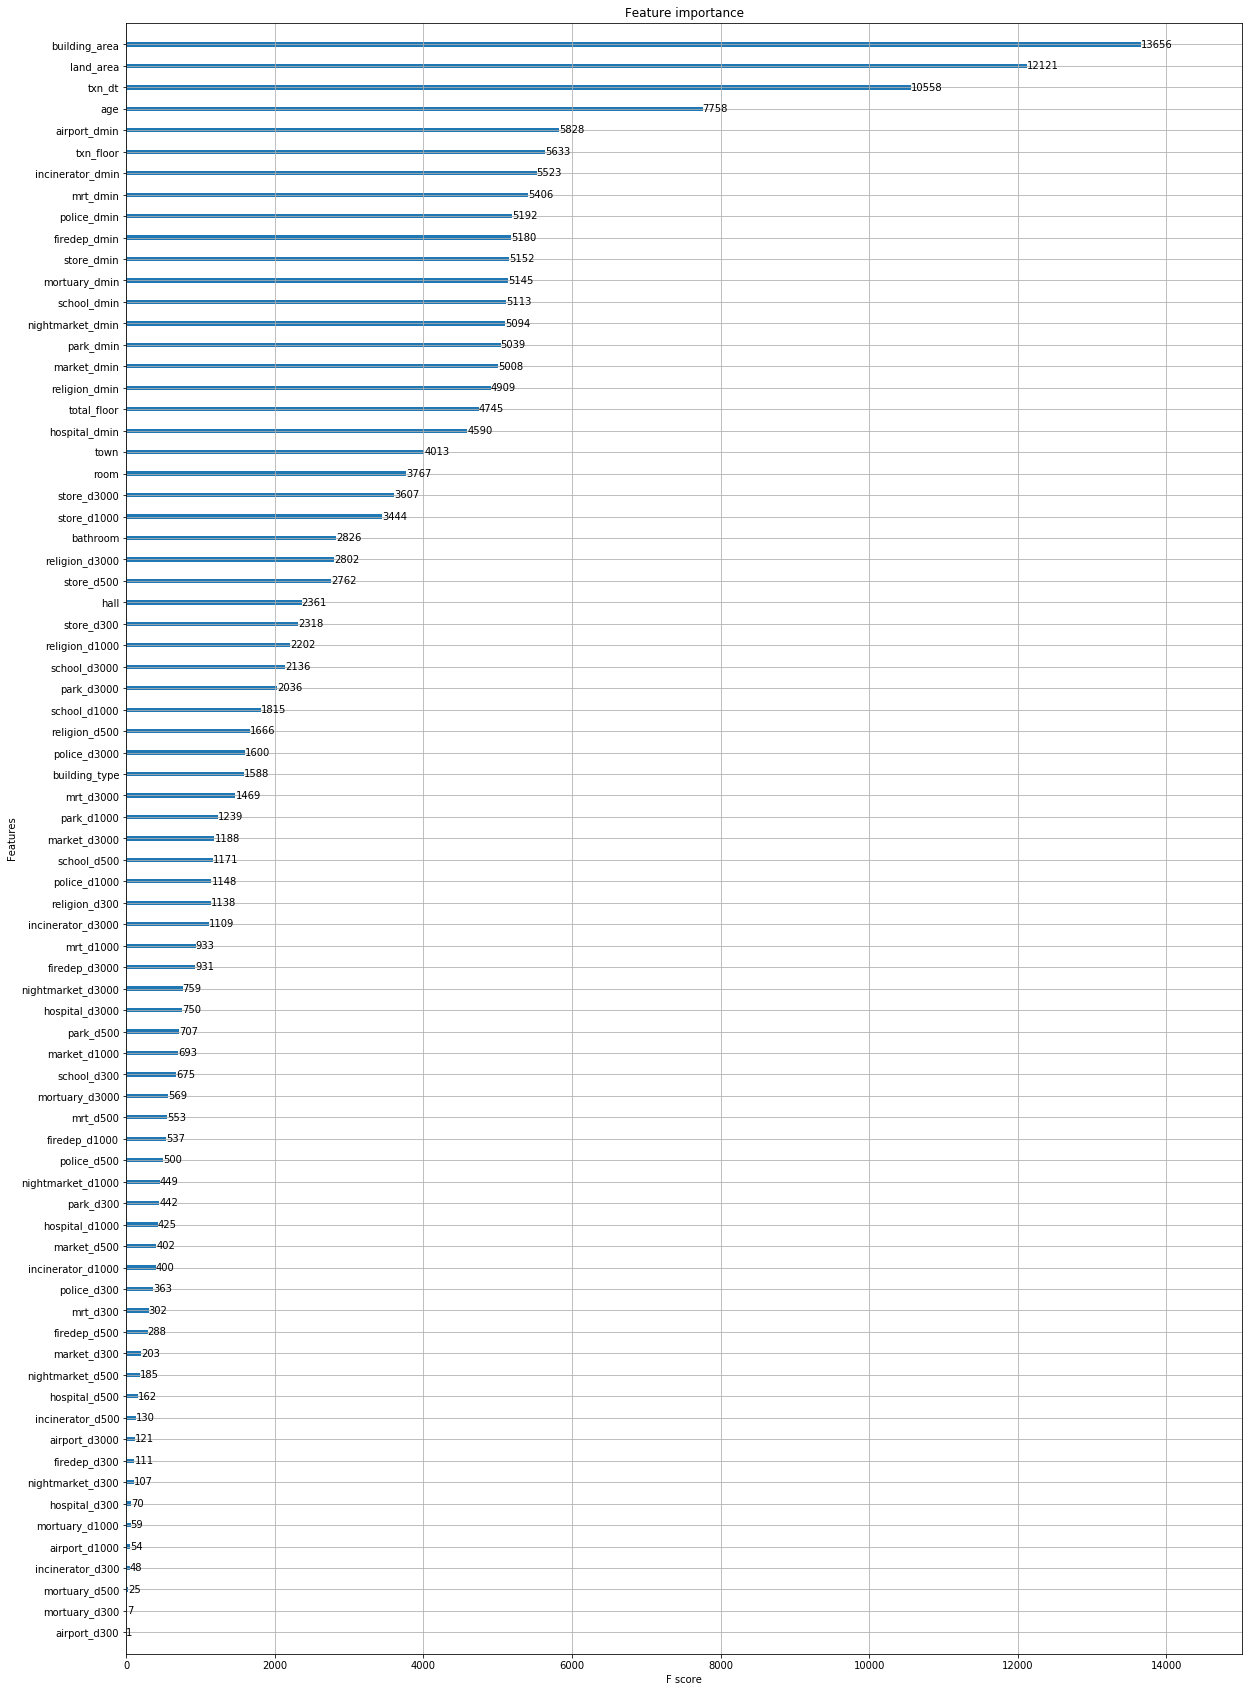

In [17]:
# 顯現重要Columns
plot_importance(model)
# gcf: Get Current Figure
fig = plt.gcf()
#plt.figure(num=None, figsize=(20, 30), dpi=120, facecolor='w', edgecolor='k')
#plt.scatter(x, y, s=area, alpha=0.5)
fig.set_size_inches(20, 30, forward=True)
plt.show()

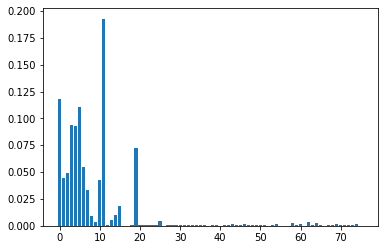

In [18]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [19]:
conn.close()